# Model Selection 

1. Type of data available :

> a. Images & Videos - CNN (Convolutional Neural Network)

> b. Texy data or Speech data - RNN (Recurrent Neural Network)

> c. Numerical data - SVM (Support vector model), Logistic Regression, Decision trees

2. Based on the task we need to carry out :

> a. Classification tasks - SVM , Logistic Regression,Decision tree

> b. Regression tasks(numerical data) - Linear Regression , Random forest , Polynomial regression .

> c. Clustering(similar data) - K-means clustering, Hierarchial clustering.

> We us logistic when there is binary classification.

> We use SVM when data is very small ad their are no outliers in the data.

> We use cross validation for choosing a model.

# Overfitting :
Model over-trains the training data. Sign that ur model is overtrained is u get HIGH TRAINING DATA ACCURACY & VERY LOW TEST DATA ACCURACY.

# Underfitting :
Does not learn enough from the data.Sign that ur model is underfitted is VERY LOW TRAINIG DATA ACCURACY.

# Bias-Variance Tradeoff :
> Bias is difference between the average prediction of our model and the correct value which we try to predict.

> Variance is the amount that is estimate of the target function will change if different training data was used.

# Data ---> Data Pre-processing ---> Data Analysis ---> Train test split ---> XGBoost Regressor ---> Evaluation

> Evaluation metric for classification : Accuracy Score

> Evaluation metric for Regression : Mean Absolute Error

# Accuracy Score :
number of correct predictions to the total number of input data points.  

# Types of Parameters :

# Model Parameters :
determined by training with training data. These can be considered as Internal Parameters. eg : Weight , Bias

# Hyperparameters :
Values control the learning process.These can be considered as External Parameters. eg : learning rate , number of epochs.

# Gradient Descent :
used for minimizing loss function.


# LINEAR REGRESSION :


In [1]:
import numpy as np
import pandas as pd

In [2]:
class LiR():
    #initiating the parameters
    def __init__(self,learning_rate,no_of_iterations):
        self.learning_rate = learning_rate
        self.no_of_iterations=no_of_iterations

    def fit(self,x,y):
        # no. of training examples & features
        self.m,self.n = x.shape #number of rows of columns
        self.w = np.zeros(self.n) # initiating weight and bias
        self.b = 0
        self.x = x
        self.y = y
        #implementing gradient descent
        for i in range(self.no_of_iterations):
            self.update_weights()

    def update_weights(self,):
        y_prediction = self.predict(self.x)
        #calculate gradients
        dw= -(2* (self.x.T).dot(self.y - y_prediction)) / self.m

        db = -2* np.sum (self.y - y_prediction) / self.m
        # updating the weights

        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self,x):
        return x.dot(self.w) + self.b  # y=wx+b


In [3]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("salary_data.csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.shape

(30, 2)

In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [9]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [10]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=2)

In [12]:
model = LiR(learning_rate=0.02,no_of_iterations=1000)

In [13]:
model.fit(x_train,y_train)

In [14]:
print(" Weight = ", model.w[0]) #weight is numpy array 
print(" Bias = ", model.b) # bias is an integer


 Weight =  9514.400999035135
 Bias =  23697.406507136307


In [15]:
#predict salary  value for test data
test_predition = model.predict(x_test)
print(test_predition)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


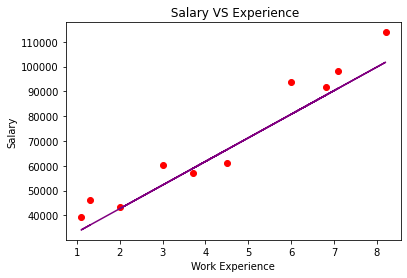

In [16]:
#visualizing the predicted and actual values
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,test_predition,color="purple")
plt.xlabel("Work Experience")
plt.ylabel("Salary")
plt.title(" Salary VS Experience")
plt.show()

# LOGISTIC REGRESSION :

> Sigmoid function :

y^ = 1 / (1 + e^-Z)

Z = w.X + b

Z --> Linear function

w --> weights ( no. of weights is equal to number of input features in a dataset)

X --> input features

y^ -- Probability that (y=1)

> Loss funtion(L) for LoR ( Binary cross entropy loss function OR Log loss) : is applies for single training set

L(y , y^) = - (y log y^ + (1-y) log (1-y^))

> Cost Funtion(J) : is applied for entire training set or complete batch

J(w , b) = 1/m sumation(L(y , y^)) = - 1/m sumation(y log y^ + (1-y) log (1-y^))

m --> number of data points in training set

In [17]:
import numpy as np

In [18]:
class LoR():
    # declaring learning rate & number of iterations (Hyperparametes)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations



  # fit function to train the model with dataset
  def fit(self, X, Y):

    # number of data points in the dataset (number of rows)  -->  m
    # number of input features in the dataset (number of columns)  --> n
    self.m, self.n = X.shape


    #initiating weight & bias value

    self.w = np.zeros(self.n)
    
    self.b = 0

    self.X = X

    self.Y = Y


    # implementing Gradient Descent for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  def update_weights(self):

    # Y_hat formula (sigmoid function)

    Y_hat = 1 / (1 + np.exp( - (self.X.dot(self.w) + self.b ) ))    # Z = wX + b
# exp --> exponent 

    # derivaties

    dw = (1/self.m)*np.dot(self.X.T, (Y_hat - self.Y)) #T --> Transpose

    db = (1/self.m)*np.sum(Y_hat - self.Y)


    # updating the weights & bias using gradient descent

    self.w = self.w - self.learning_rate * dw

    self.b = self.b - self.learning_rate * db


  # Sigmoid Equation & Decision Boundary

  def predict(self, X):

    Y_pred = 1 / (1 + np.exp( - (X.dot(self.w) + self.b ) )) 
    Y_pred = np.where( Y_pred > 0.5, 1, 0) # where is used for comparison; if Y_pred > 0.5 then we take 1 else 0
    return Y_pred

In [19]:
model = LoR(learning_rate=0.01,no_of_iterations=1000)

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [22]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [25]:
# separating the data and labels
features = diabetes_dataset.drop(columns = 'Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [26]:
print(features) # all comlumns except the output column

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [27]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(features)

StandardScaler()

In [30]:
standardized_data = scaler.transform(features)

In [31]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [32]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [33]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [35]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [36]:
classifier = LoR(learning_rate=0.01, no_of_iterations=1000)

In [37]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

In [38]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [39]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7768729641693811


In [40]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [41]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


In [42]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\Priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# SUPPORT VECTOR MACHINE :
Nearest points to the Hyperplane are called as support vectors. 

Margin is the distance between the two classes or support 
vectors.

Hinge Loss is used for maximum margin classification models. Correct classification happens when model has low hinge loss value.

> SVM Kernel : transforms training set of data to linear equation.

> TYPES :

1. Linear ( used when No. of features in high in dataset ) 

2. Polynomial ,poly( used when No. of features in low in dataset )

3. Radial Basis Function (rbf) ( used when No. of features in low in dataset )

4. Sigmoid 

In [43]:
import numpy as np

In [44]:
class SVM_classifier():

  # initiating the hyperparameters
  # self takes value of an instance created
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter
  
  # fitting the dataset to SVM Classifier
  def fit(self, X, Y):

    # m  --> number of Data points --> number of rows
    # n  --> number of input features --> number of columns
    self.m, self.n = X.shape

    # initiating the weight value and bias value

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):
      self.update_weights()



  # function for updating the weight and bias value
  def update_weights(self):

    # label encoding
    y_label = np.where(self.Y <= 0, -1, 1)



    # gradients ( dw, db)
    for index, x_i in enumerate(self.X):
# enumerate gives u index value with the data
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):

        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:

        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]


      self.w = self.w - self.learning_rate * dw

      self.b = self.b - self.learning_rate * db



  # predict the label for a given input value
  def predict(self, X):

    output = np.dot(X, self.w) - self.b
    
    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat

    



In [45]:
my_list =[2,32,4,67,85,50]
for i,my_list_i in enumerate(my_list):
    print(i,my_list_i)

0 2
1 32
2 4
3 67
4 85
5 50


In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [48]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [50]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [51]:
# separating the data and labels
features = diabetes_dataset.drop(columns = 'Outcome', axis=1)
target = diabetes_dataset['Outcome']

In [52]:
print(features)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [53]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [54]:
scaler = StandardScaler()

In [55]:
scaler.fit(features)

StandardScaler()

In [56]:
standardized_data = scaler.transform(features)

In [57]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [58]:
features = standardized_data
target = diabetes_dataset['Outcome']

In [59]:
print(features)
print(target)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.2, random_state=2)

In [61]:
print(features.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [62]:
classifier = SVM_classifier(learning_rate=0.001, no_of_iterations=1000, lambda_parameter = 0.01)

In [63]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

In [64]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score( Y_train, X_train_prediction)

In [65]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7768729641693811


In [66]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score( Y_test, X_test_prediction)

In [67]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7532467532467533


In [68]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\Priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [69]:
import pickle

In [70]:
filename = "Trained_model.sav"
pickle.dump(classifier,open(filename,"wb"))  

In [71]:
# loading the saved model
loaded_model = pickle.load(open("Trained_model.sav", 'rb'))

In [72]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


C:\Users\Priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# LASSO(Least Absolute Shrinkage and Selection Operation) REGRESSION

Regularization is used to reduce the overfitting of model by adding penalty(makes some values zero) term(lamda). Lasso uses L1 regularization technique.



In [73]:
import numpy as np

In [74]:
# creating a class for Lasso Regression

class Lasso_Regression():

  #initiating the hyperparameters
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter


  # fitting the dataset to the Lasso Regression model
  def fit(self, X, Y):

    # m --> number of Data points --> number of rows
    # n --> number of input features --> number of columns
    self.m, self.n = X.shape

    self.w = np.zeros(self.n)

    self.b = 0

    self.X = X

    self.Y = Y

    # implementing Gradient Descent algorithm for Optimization

    for i in range(self.no_of_iterations):     # missed "self"
      self.upadte_weights()


  # function for updating the weight & bias value
  def upadte_weights(self):

    # linear equation of the model
    Y_prediction = self.predict(self.X)

    # gradients (dw, db)

    # gradient for weight
    dw = np.zeros(self.n)

    for i in range(self.n):

      if self.w[i]>0:

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_parameter) / self.m 

      else :

        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_parameter) / self.m


    # gradient for bias
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m


    # updating the weights & bias

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

    


  # Predicting the Target variable
  def predict(self,X):

    return X.dot(self.w) + self.b




In [75]:
# importing the dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics

In [76]:
# loading the data from csv file to a pandas dataframe

salary_data = pd.read_csv('salary_data.csv')

In [77]:
# number of rows & columns in the dataframe
salary_data.shape

(30, 2)

In [78]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [79]:
features = salary_data.iloc[:,:-1].values      
target = salary_data.iloc[:,1].values

In [80]:
print(features)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [81]:
print(target)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, 
                                                    test_size=0.33, 
                                                    random_state = 2)

In [83]:
model = Lasso_Regression(learning_rate = 0.02, no_of_iterations=1000,
                         lambda_parameter=200)

In [84]:
model.fit(X_train, Y_train)

In [85]:
test_data_prediction = model.predict(X_test)

In [86]:
print(test_data_prediction)

[ 36068.90441536  34166.14804787  66513.00629512  58901.98082518
  91248.83907243  80783.67905126 101713.9990936   52242.33353898
  42728.55170156  88394.7045212 ]


In [87]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9041366551714738
Mean Absolute Error :  6675.382767802961


In [88]:
from sklearn.linear_model import Lasso
sk_model = Lasso()

In [89]:
sk_model.fit(X_train, Y_train)

Lasso()

In [90]:
sk_test_data_prediction = sk_model.predict(X_test)

In [91]:
# R squared error
score_1_ = metrics.r2_score(Y_test, sk_test_data_prediction)

# Mean Absolute Error
score_2_ = metrics.mean_absolute_error(Y_test, sk_test_data_prediction)

print("R squared error : ", score_1_)
print('Mean Absolute Error : ', score_2_)

R squared error :  0.9041817142395875
Mean Absolute Error :  6673.480440148538


# K - NEAREST NEIGHBORS (KNN)

Manhattan is preferred over Euclidean for big data.

> **Euclidean** Distance
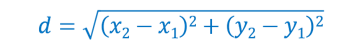

> **Manhattan** Distance

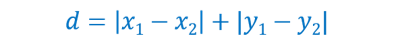


In [92]:
import numpy as np

In [93]:
# consider two points with 2 dimensions
p1 = (1,1)
p2 = (2,2)

In [94]:
# calculating Euclidean Distance 

dist = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

1.4142135623730951


In [95]:
# consider two points with 3 dimensions
p1 = (1,1,1)
p2 = (2,2,2)

# calculating Euclidean Distance 

dist = (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

1.7320508075688772


In [96]:
# consider two points with 4 dimensions
p1 = (1,1,1,1)
p2 = (2,2,2,2)

dist = 0

for i in range(len(p1)):
  dist = dist + (p1[i] - p2[i])**2

euclidean_dist = np.sqrt(dist)
print(euclidean_dist)

2.0


In [97]:
def get_euclidean_distance(p1, p2):

  dist = 0

  for i in range(len(p1)):
    dist = dist + (p1[i] - p2[i])**2

  euclidean_dist = np.sqrt(dist)
  print(euclidean_dist)

In [98]:
get_euclidean_distance((1,1,1), (2,2,2))

1.7320508075688772


In [99]:
def get_manhattan_distance(p1, p2):

  dist = 0

  for i in range(len(p1)):
    dist = dist + abs(p1[i] - p2[i])

    manhattan_dist = dist

  print(manhattan_dist)

In [100]:
get_manhattan_distance((1,1,1,1),(2,2,2,2))

4


In [101]:
# abs --> absolute value
print(abs(1-2))

1


In [102]:
# distance between two similar data points

print(get_euclidean_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(37,1,2,130,250,0,1,187,0,3.5,0,0,2)))
print(get_manhattan_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(37,1,2,130,250,0,1,187,0,3.5,0,0,2)))

50.640300157088326
None
100.2
None


In [103]:
# distance between two dissimilar data points

print(get_euclidean_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(67,1,0,160,286,0,0,108,1,1.5,1,3,2)))
print(get_manhattan_distance((63,1,3,145,233,1,0,150,0,2.3,0,0,1),(67,1,0,160,286,0,0,108,1,1.5,1,3,2)))

69.54595602908914
None
124.8
None


In [104]:
import numpy as np
import statistics

In [105]:
class KNN_Classifier():

  # initiating the parameters
  def __init__(self, distance_metric):

    self.distance_metric = distance_metric

  # getting the distance metric
  def get_distance_metric(self,training_data_point, test_data_point):

    if (self.distance_metric == 'euclidean'):

      dist = 0
      for i in range(len(training_data_point) - 1):
        dist = dist + (training_data_point[i] - test_data_point[i])**2

      euclidean_dist = np.sqrt(dist)
    
      return euclidean_dist

    elif (self.distance_metric == 'manhattan'):

      dist = 0

      for i in range(len(training_data_point) - 1):
        dist = dist + abs(training_data_point[i] - test_data_point[i])

      manhattan_dist = dist

      return manhattan_dist

  # getting the nearest neighbors
  def nearest_neighbors(self,X_train, test_data, k):

    distance_list = []

    for training_data in X_train:

      distance = self.get_distance_metric(training_data, test_data)
      distance_list.append((training_data, distance))

    distance_list.sort(key=lambda x: x[1])

    neighbors_list = []

    for j in range(k):
      neighbors_list.append(distance_list[j][0])

    return neighbors_list


  # predict the class of the new data point:
  def predict(self,X_train, test_data, k):
    neighbors = self.nearest_neighbors(X_train, test_data, k)
    
    for data in neighbors:
      label = []
      label.append(data[-1])

    predicted_class = statistics.mode(label)

    return predicted_class


In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [107]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [116]:
# separating features and Target
X = diabetes_dataset.drop(columns='Outcome', axis = 1)
Y = diabetes_dataset['Outcome']

In [118]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [121]:
# train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [122]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [123]:
print(X_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
619            0      119              0              0        0  32.4   
329            6      105             70             32       68  30.8   
13             1      189             60             23      846  30.1   
476            2      105             80             45      191  33.7   
45             0      180             66             39        0  42.0   
..           ...      ...            ...            ...      ...   ...   
303            5      115             98              0        0  52.9   
592            3      132             80              0        0  34.4   
559           11       85             74              0        0  30.1   
725            4      112             78             40        0  39.4   
253            0       86             68             32        0  35.8   

     DiabetesPedigreeFunction  Age  
619                     0.141   24  
329                     0.122   37  


In [124]:
print(Y_train)

619    1
329    0
13     1
476    1
45     1
      ..
303    1
592    1
559    0
725    0
253    0
Name: Outcome, Length: 614, dtype: int64


In [125]:
X_train=np.insert(X_train,8,Y_train,axis=1)

ValueError: Shape of passed values is (614, 9), indices imply (614, 8)

In [111]:
classifier = KNeighborsClassifier(p=1)

In [112]:
classifier.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [113]:
y_pred = classifier.predict(X_test)

In [114]:
accuracy = accuracy_score(Y_test, y_pred)

In [115]:
print(accuracy*100)

77.92207792207793


In [126]:
classifier = KNN_Classifier(distance_metric= 'euclidean')

In [127]:
prediction= classifier.predict(X_train,X_test[0],k=5)

KeyError: 0

In [128]:
print(Y_test[0])

KeyError: 0

In [129]:
print(prediction)

[1]


# DECISION TREE :

> **ENTROPY** -

how random is the data that we have. If Randomness in data is MORE then Entropy is HIGH and Information gain will be LOW.
> High value in entropy means randomness is high and thus making accurate predictions is tough.

> Low value in entropy means randomness is low and thus making accurate predictions is easier.

> **INFORMATION GAIN** -

It means how much information a feature provides about the class. Entropy is inversely proportional to Information Gain.

Tv --> class/arget of particular datapoint
T --> Total no. of class

> **GINI IMPURITY** -

Splits made in Descision tree is said to be PURE if all data points are accurately separated into different classes. Gini impurity measures the likelihood that a randomly selected datapoint would incorrectly classified bt a specific node.

C --> no. of classes

# K-Fold Cross-Validation :
We split data into "K" number of folds(subsets). One chunk of data is used as test data for evaluation & remaining part of data is used for training the model. Each time , a different chunk will be used as test data.


In [131]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [133]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [134]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [135]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [136]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [137]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [138]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [139]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [140]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [142]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)


In [143]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [152]:
#comparing the performance of the models
models=[LogisticRegression(max_iter=1000),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier()]

In [153]:
def compare_models():
    for model in models:
        model.fit(X_train,Y_train) #training a model
        test_data_prediction = model.predict(X_test) #evaluating a model
        accuracy=accuracy_score(Y_test,test_data_prediction)
        print("Accuracy score of the ", model,"=",accuracy)

In [154]:
compare_models()

Accuracy score of the  LogisticRegression(max_iter=1000) = 0.7704918032786885
Accuracy score of the  SVC(kernel='linear') = 0.7704918032786885
Accuracy score of the  KNeighborsClassifier() = 0.6557377049180327
Accuracy score of the  RandomForestClassifier() = 0.819672131147541


> CROSS VALIDATION

In [160]:
cv_score_lr =cross_val_score(LogisticRegression(max_iter=1000),X,Y,cv=5) # cv is how many subsets of data i want
print(cv_score_lr)
mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
82.83


In [164]:
cv_score_svc = cross_val_score(SVC(kernel='linear'), X, Y, cv=5)

print(cv_score_svc)

mean_accuracy_svc = sum(cv_score_svc)/len(cv_score_svc)

mean_accuracy_svc = mean_accuracy_svc*100

mean_accuracy_svc = round(mean_accuracy_svc, 2)

print(mean_accuracy_svc)

[0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
82.83


In [161]:
# list of models
models = [LogisticRegression(max_iter=1000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier()]

In [162]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, X,Y, cv=5)
    
    mean_accuracy = sum(cv_score)/len(cv_score)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score)
    print('Accuracy % of the ', model, mean_accuracy)
    print('----------------------------------------------')


In [163]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000) =   [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Accuracy % of the  LogisticRegression(max_iter=1000) 82.83
----------------------------------------------
Cross Validation accuracies for  SVC(kernel='linear') =   [0.81967213 0.8852459  0.80327869 0.86666667 0.76666667]
Accuracy % of the  SVC(kernel='linear') 82.83
----------------------------------------------
Cross Validation accuracies for  KNeighborsClassifier() =   [0.60655738 0.6557377  0.57377049 0.73333333 0.65      ]
Accuracy % of the  KNeighborsClassifier() 64.39
----------------------------------------------
Cross Validation accuracies for  RandomForestClassifier() =   [0.83606557 0.90163934 0.81967213 0.81666667 0.76666667]
Accuracy % of the  RandomForestClassifier() 82.81
----------------------------------------------


# HYPERPARAMETER TUNING :
choosing optimum set of hyperparameters for ML.
eg: learning rate,n_estimators(number of trees in the forest and is by default 100), 

# 1. GridSearchCV
find accuracy for all different combination of hyperparameter.
# 2. RandomizedSearchCV 
take random hyperparameter values and see for which combination of cv we get high accuracy.

In [166]:
# importing the dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [167]:
# loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [168]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [169]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [170]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [171]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [172]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [173]:
# number of rows and Columns in this dataset
data_frame.shape

(569, 31)

In [174]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [175]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

1 --> Benign

0 --> Malignant

In [176]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [177]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [178]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32


In [179]:
 X = np.asarray(X)
 Y = np.asarray(Y)

# **GridSearchCV**

In [181]:
# loading the SVC model
model = SVC()

In [182]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [183]:
# grid search
classifier = GridSearchCV(model, parameters, cv=5)

In [184]:
# fitting the data to our model
classifier.fit(X, Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [185]:
classifier.cv_results_

{'mean_fit_time': array([1.29648972e+00, 9.01317596e-04, 3.38912010e-03, 8.43472481e-03,
        2.27120485e+00, 2.34241486e-03, 3.56698036e-03, 8.37764740e-03,
        3.92571130e+00, 6.66880608e-03, 6.64663315e-03, 1.65834904e-02,
        1.13878504e+01, 6.24866486e-03, 5.51919937e-03, 1.95141792e-02]),
 'std_fit_time': array([6.08477127e-01, 1.80263519e-03, 2.99795669e-03, 3.17187789e-03,
        5.95766456e-01, 1.30300897e-03, 3.06556837e-03, 3.02658538e-03,
        5.31438898e-01, 3.83761414e-03, 1.68758203e-03, 3.01914289e-03,
        3.84866600e+00, 2.80816644e-03, 3.07433560e-03, 1.64026065e-03]),
 'mean_score_time': array([0.0003231 , 0.00103703, 0.00356102, 0.001544  , 0.00080276,
        0.00159488, 0.00050044, 0.00179477, 0.00203352, 0.00100112,
        0.00431914, 0.00399513, 0.00042391, 0.00140095, 0.00540247,
        0.00061159]),
 'std_score_time': array([0.00064621, 0.00144514, 0.00261513, 0.003088  , 0.00160551,
        0.00318975, 0.00100088, 0.00257554, 0.00266535, 

In [186]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'C': 10, 'kernel': 'linear'}


In [187]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [188]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [189]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.296490,0.608477,0.000323,0.000646,1,linear,"{'C': 1, 'kernel': 'linear'}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,4
1,0.000901,0.001803,0.001037,0.001445,1,poly,"{'C': 1, 'kernel': 'poly'}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,12
2,0.003389,0.002998,0.003561,0.002615,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,11
3,0.008435,0.003172,0.001544,0.003088,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.543860,0.456140,0.464912,0.385965,0.451327,0.460441,0.050253,13
4,2.271205,0.595766,0.000803,0.001606,5,linear,"{'C': 5, 'kernel': 'linear'}",0.947368,0.938596,0.973684,0.929825,0.964602,0.950815,0.016216,2


In [190]:
grid_search_result = result[['param_C','param_kernel','mean_test_score']]

In [191]:
grid_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,1,poly,0.908663
2,1,rbf,0.912172
3,1,sigmoid,0.460441
4,5,linear,0.950815
5,5,poly,0.922729
6,5,rbf,0.931501
7,5,sigmoid,0.411178
8,10,linear,0.952569
9,10,poly,0.920975


# **RandomizedSearchCV**

In [192]:
# loading the SVC model
model = SVC()

In [193]:
# hyperparameters

parameters = {
              'kernel':['linear','poly','rbf','sigmoid'],
              'C':[1, 5, 10, 20]
}

In [194]:
# grid search
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [195]:
# fitting the data to our model
classifier.fit(X, Y)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [196]:
classifier.cv_results_

{'mean_fit_time': array([1.21229482e+00, 8.23612213e-03, 6.05416298e-03, 3.42445374e-03,
        4.64529991e-03, 1.10017300e-02, 3.80628042e+00, 7.96494484e-03,
        7.55172458e+00, 6.66580200e-03]),
 'std_fit_time': array([5.68033344e-01, 1.22909645e-03, 4.95037356e-03, 2.34961910e-03,
        2.54138518e-03, 4.31156361e-03, 6.60041779e-01, 1.77060382e-03,
        4.10923021e+00, 7.17725109e-04]),
 'mean_score_time': array([0.        , 0.00352235, 0.        , 0.00191746, 0.00053115,
        0.00277934, 0.00232387, 0.00090837, 0.00076733, 0.00165515]),
 'std_score_time': array([0.        , 0.00355243, 0.        , 0.00312751, 0.0010623 ,
        0.00281485, 0.00238258, 0.0006181 , 0.00153465, 0.00052754]),
 'param_kernel': masked_array(data=['linear', 'sigmoid', 'rbf', 'poly', 'poly', 'sigmoid',
                    'linear', 'poly', 'linear', 'sigmoid'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='

In [197]:
# best parameters

best_parameters = classifier.best_params_
print(best_parameters)

{'kernel': 'linear', 'C': 10}


In [198]:
# higest accuracy

highest_accuracy = classifier.best_score_
print(highest_accuracy)

0.9525694767893185


In [199]:
# loading the results to pandas dataframe
result = pd.DataFrame(classifier.cv_results_)

In [200]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.212295,0.568033,0.000000,0.000000,linear,1,"{'kernel': 'linear', 'C': 1}",0.947368,0.929825,0.973684,0.921053,0.955752,0.945536,0.018689,3
1,0.008236,0.001229,0.003522,0.003552,sigmoid,10,"{'kernel': 'sigmoid', 'C': 10}",0.482456,0.403509,0.421053,0.342105,0.362832,0.402391,0.048906,9
2,0.006054,0.004950,0.000000,0.000000,rbf,1,"{'kernel': 'rbf', 'C': 1}",0.850877,0.894737,0.929825,0.947368,0.938053,0.912172,0.035444,6
3,0.003424,0.002350,0.001917,0.003128,poly,5,"{'kernel': 'poly', 'C': 5}",0.885965,0.912281,0.921053,0.938596,0.955752,0.922729,0.023689,4
4,0.004645,0.002541,0.000531,0.001062,poly,1,"{'kernel': 'poly', 'C': 1}",0.842105,0.885965,0.929825,0.947368,0.938053,0.908663,0.039382,7


In [201]:
randomized_search_result = result[['param_C','param_kernel','mean_test_score']]

In [202]:
randomized_search_result

,param_C,param_kernel,mean_test_score
0,1,linear,0.945536
1,10,sigmoid,0.402391
2,1,rbf,0.912172
3,5,poly,0.922729
4,1,poly,0.908663
5,5,sigmoid,0.411178
6,10,linear,0.952569
7,20,poly,0.919221
8,20,linear,0.949061
9,20,sigmoid,0.398867


# ACCURACY SCORE ::
In classification,it is the ratio of no. of correct predictions to the total numbe of input data points.

# CONFUSION MATRIX ::
used for evaluating the performance of a classification model.gives more info than the accuracy score.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [6]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [9]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [10]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [13]:
model = LogisticRegression(max_iter=1000)

In [14]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

0.8553719008264463


In [17]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  85.54 %


In [18]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

0.8032786885245902


In [19]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  80.33 %


In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cf_matrix = confusion_matrix(Y_test, X_test_prediction)

print(cf_matrix)

[[22  6]
 [ 6 27]]


In [22]:
tn, fp, fn, tp = cf_matrix.ravel() # ravel is used to know which is tp,fn,fp,tn

print(tn, fp, fn, tp)

22 6 6 27


<AxesSubplot:>

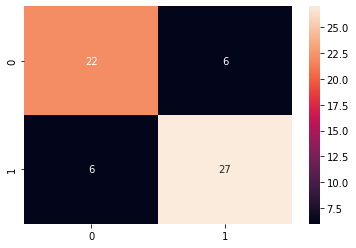

In [23]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True) # annot --> annotation means i want values on the squares 

# PRECISION ::
P = True Positive / (True Positive + False Positive)

It measures out of the total predicted positive , how many are actually positive. It measures the error caused by False Positive.

# RECALL :: 
R = True Positive / (True Positive + False Negative)

It measures out of the total actual positive , how many are actually predicted as True positive. It measures the error caused by False Negative.

# F1 SCORE ::
Imp evaluation metric for binary classification that combines Precision & Recall. It is the Harmonic mean of Precision & Recall. 

F1 Score = 2 * ( [Precision * Recall ] / [Precision + Recall ])

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [9]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [10]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [13]:
model = LogisticRegression(max_iter=1000)

In [14]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(training_data_accuracy)

0.8553719008264463


In [17]:
print('Accuracy on Training data : ', round(training_data_accuracy*100, 2), '%')

Accuracy on Training data :  85.54 %


In [18]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(test_data_accuracy)

0.8032786885245902


In [19]:
print('Accuracy on Test data : ', round(test_data_accuracy*100, 2), '%')

Accuracy on Test data :  80.33 %


In [20]:
from sklearn.metrics import precision_score

In [21]:
# precision for training data predictions
precision_train = precision_score(Y_train, X_train_prediction)
print('Training data Precision =', precision_train)

Training data Precision = 0.8299319727891157


In [22]:
# precision for test data predictions
precision_test = precision_score(Y_test, X_test_prediction)
print('Test data Precision =', precision_test)

Test data Precision = 0.8181818181818182


In [23]:
from sklearn.metrics import recall_score

In [24]:
# recall for training data predictions
recall_train = recall_score(Y_train, X_train_prediction)
print('Training data Recall =', recall_train)

Training data Recall = 0.9242424242424242


In [25]:
# recall for test data predictions
recall_test = recall_score(Y_test, X_test_prediction)
print('Test data Recall =', recall_test)

Test data Recall = 0.8181818181818182


In [26]:
from sklearn.metrics import f1_score

In [27]:
# F1 score for training data predictions
f1_score_train = f1_score(Y_train, X_train_prediction)
print('Training data F1 Score =', f1_score_train)

Training data F1 Score = 0.8745519713261649


In [28]:
# F1 Score for test data predictions
f1_score_test = recall_score(Y_test, X_test_prediction)
print('Test data F1 Score =', f1_score_test)

Test data F1 Score = 0.8181818181818182


In [29]:
def precision_recall_f1_score(true_labels, pred_labels):

  precision_value = precision_score(true_labels, pred_labels)
  recall_value = recall_score(true_labels, pred_labels)
  f1_score_value = f1_score(true_labels, pred_labels)

  print('Precision =',precision_value)
  print('Recall =',recall_value)
  print('F1 Score =',f1_score_value)

In [30]:
# classification metrics for training data
precision_recall_f1_score(Y_train, X_train_prediction)

Precision = 0.8299319727891157
Recall = 0.9242424242424242
F1 Score = 0.8745519713261649


In [31]:
# classification metrics for test data
precision_recall_f1_score(Y_test, X_test_prediction)

Precision = 0.8181818181818182
Recall = 0.8181818181818182
F1 Score = 0.8181818181818182
